In [1]:
import pandas as pd
import time
import re

In [2]:
start_time = time.time()
d1 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2301-2306.csv')
d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')
d3 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2401-2405.csv')
tmp_data = pd.concat([d1, d2, d3], ignore_index=True)
print(round((time.time() - start_time)/60, 2))

C:\Users\research_01\AppData\Local\Temp\61\ipykernel_20540\1267394010.py:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')


3.07


In [3]:
data = tmp_data.copy()
data.rename(columns = {'이용시간(분)' : '이용시간'}, inplace = True)
data.rename(columns = {'이동거리(M)' : '이동거리'}, inplace = True)
data = data[data.이용시간 != 0]
data = data[data.이동거리 != 0]
data = data.dropna(axis=0)
print(len(tmp_data), len(data))

55032314 37904172


In [4]:
tmp = data['대여일자'].unique()
date_list = []
weekday_to_date = {}
for i in range(len(tmp)):
    date_list.append(int(tmp[i].replace('-','')))
    if i%7 not in weekday_to_date:
        weekday_to_date[i%7] = []
    weekday_to_date[i%7].append(tmp[i])
print(len(date_list))

517


In [5]:
date_to_weekday = dict()
for weekday, dates in weekday_to_date.items():
    for date in dates:
        date_to_weekday[date] = weekday
data['요일'] = data['대여일자'].map(date_to_weekday)

In [6]:
ph_day_list = ['2023-01-01','2023-01-21','2023-01-22','2023-01-23','2023-01-24','2023-03-01','2023-05-05',
                '2023-05-27','2023-05-29','2023-06-06','2023-08-15','2023-09-28','2023-09-29','2023-09-30',
                '2023-10-02','2023-10-03','2023-10-09','2023-12-25','2024-01-01','2024-02-09','2024-02-10',
                '2024-02-11','2024-02-12','2024-03-01','2024-04-10','2024-05-05','2024-05-06','2024-05-15']

date_to_phday = dict()
for weekday, dates in weekday_to_date.items():
    if weekday == 0 or weekday == 6:
        for date in dates:
            date_to_phday[date] = 0
    else:
        for date in dates:
            if date in ph_day_list:
                date_to_phday[date] = 0
            else:
                date_to_phday[date] = 1
                
phday_to_date = dict()
for date, phday in date_to_phday.items():
    if phday not in phday_to_date:
        phday_to_date[phday] = []
    phday_to_date[phday].append(date)
    
data['공휴일'] = data['대여일자'].map(date_to_phday)

In [7]:
tmp = data.groupby(['공휴일','연령대코드']).size()

In [8]:
cnt_dict = dict()
for i in range(1,9):
    if i == 8:
        cnt_dict[''] = 0
    else:
        cnt_dict[str(i*10)] = 0

In [9]:
cur = sorted(tmp.index)[0][0]
a_dict = {0:[], 1:[]}

for i in sorted(tmp.index):
    if i[0] != cur:
        print('-'*30)
        cur = i[0]
    a = re.sub('[^0-9]','',i[1])
    cnt_dict[a] += tmp[i]
    a_dict[i[0]].append(tmp[i])
    print(i, tmp[i])

(0, '20대') 3075367
(0, '30대') 2441326
(0, '40대') 1492741
(0, '50대') 1053432
(0, '60대') 364548
(0, '70대이상') 58640
(0, '~10대') 899966
(0, '기타') 833683
------------------------------
(1, '20대') 7540477
(1, '30대') 6755492
(1, '40대') 4596556
(1, '50대') 3269331
(1, '60대') 1122125
(1, '70대이상') 179365
(1, '~10대') 1930019
(1, '기타') 2291104


In [10]:
print(cnt_dict)
cnt_tot = 0
for key in cnt_dict.keys():
    cnt_tot += cnt_dict[key]
print(cnt_tot, len(data))

{'10': 2829985, '20': 10615844, '30': 9196818, '40': 6089297, '50': 4322763, '60': 1486673, '70': 238005, '': 3124787}
37904172 37904172


In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [12]:
labels = []
for idx in sorted(tmp.index):
    if idx[1] not in labels:
        labels.append(idx[1])
print(labels)
titles = {0:'공휴일',1:'평일'}

['20대', '30대', '40대', '50대', '60대', '70대이상', '~10대', '기타']


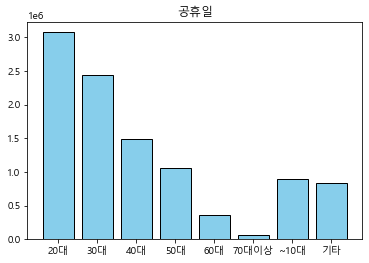

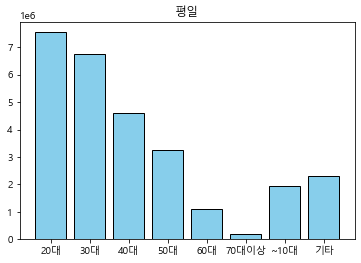

In [13]:
for key in a_dict.keys():
    plt.bar(labels,a_dict[key], color='skyblue', edgecolor='black')    
    plt.title(titles[key])
    plt.show()

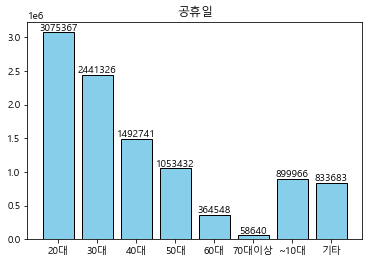

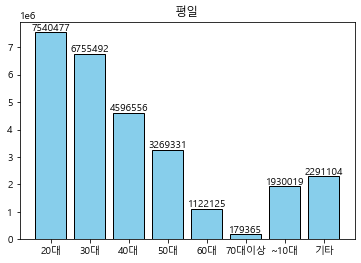

In [19]:
for key in a_dict.keys():
    plt.bar(labels,a_dict[key], color='skyblue', edgecolor='black')
    for i, value in enumerate(a_dict[key]):
        plt.text(labels[i], value + 500, str(value), ha='center', va='bottom')
    plt.title(titles[key])
    plt.show()

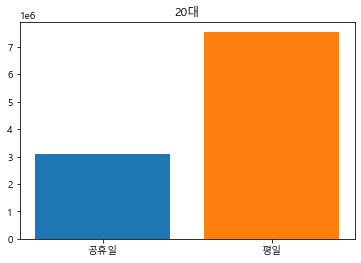

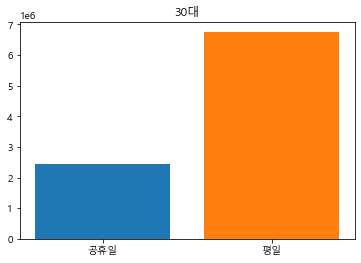

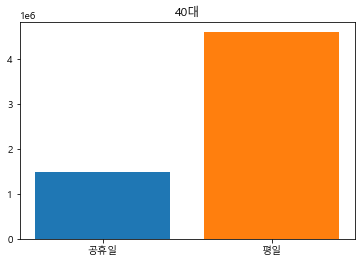

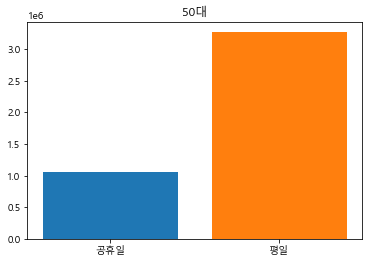

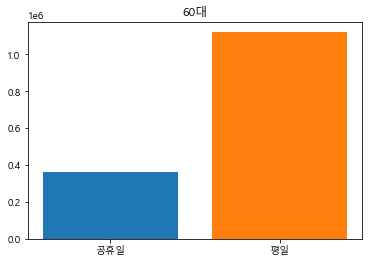

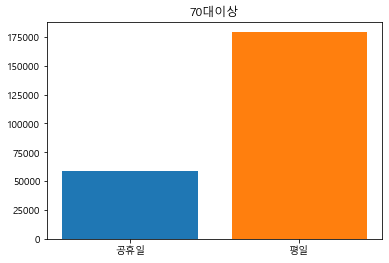

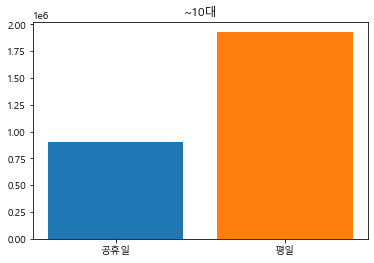

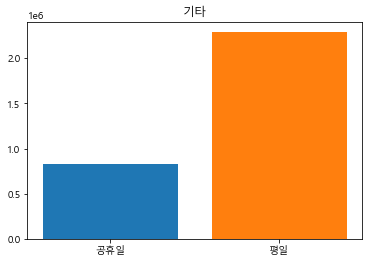

In [20]:
p_n_labels = ['공휴일','평일']
for i in range(8):
    plt_bar = []
    for key in sorted(a_dict.keys()):
        plt_bar.append(a_dict[key][i])
    plt.bar(p_n_labels[0], plt_bar[0])
    plt.bar(p_n_labels[1], plt_bar[1])
    plt.title(labels[i])
    plt.show()

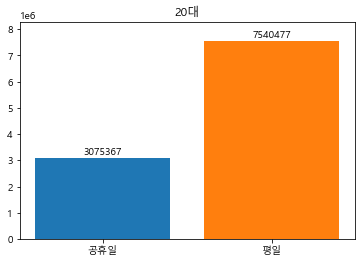

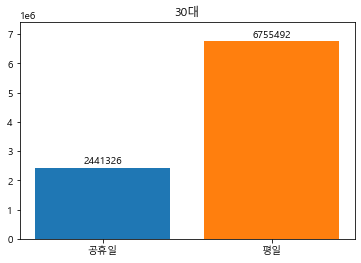

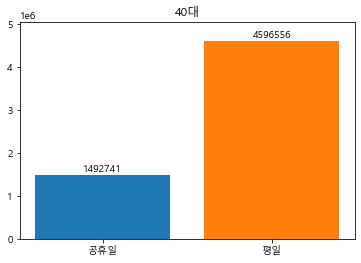

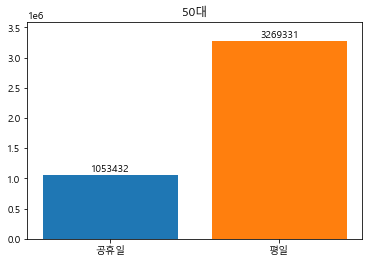

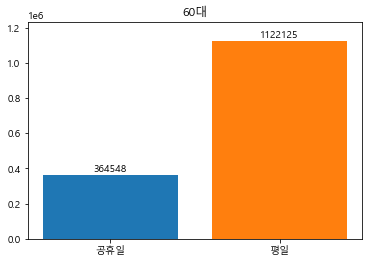

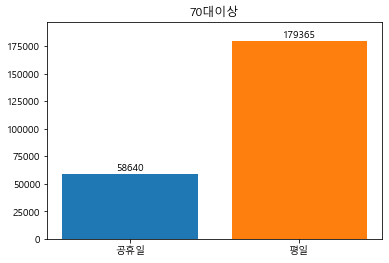

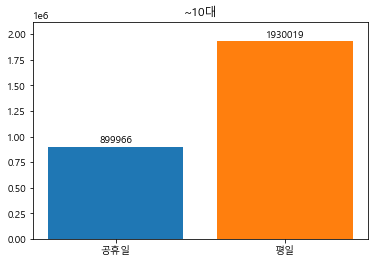

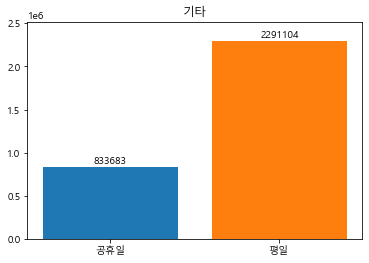

In [22]:
p_n_labels = ['공휴일','평일']
for i in range(8):
    plt_bar = []
    for key in sorted(a_dict.keys()):
        plt_bar.append(a_dict[key][i])
    plt.bar(p_n_labels[0], plt_bar[0])
    plt.bar(p_n_labels[1], plt_bar[1])
    plt.title(labels[i])
    
    plt.text(p_n_labels[0], plt_bar[0] + plt_bar[0]*0.025, str(plt_bar[0]), ha='center', va='bottom')
    plt.text(p_n_labels[1], plt_bar[1] + plt_bar[0]*0.025, str(plt_bar[1]), ha='center', va='bottom')

    plt.ylim(0, max(plt_bar)*1.1)
    plt.show()